#**Machine Learning**

Whenever you build a ML solution, :
1. what is exactly my problem statement and do I have the relevant data to answer it?
2. what is the best way to phrase my problem statement as a ML problem
3. do i have enough data to solve the problem
4. What features from the data should I extract to make the right predictions?
5. How will i measure the success rate of my predictions


##**scikit-learn**

It is a python library contaning different ML algorithms.

In [ ]:
#for installing
!pip install scikit-learn

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## First Application: Classifying Iris Flower species

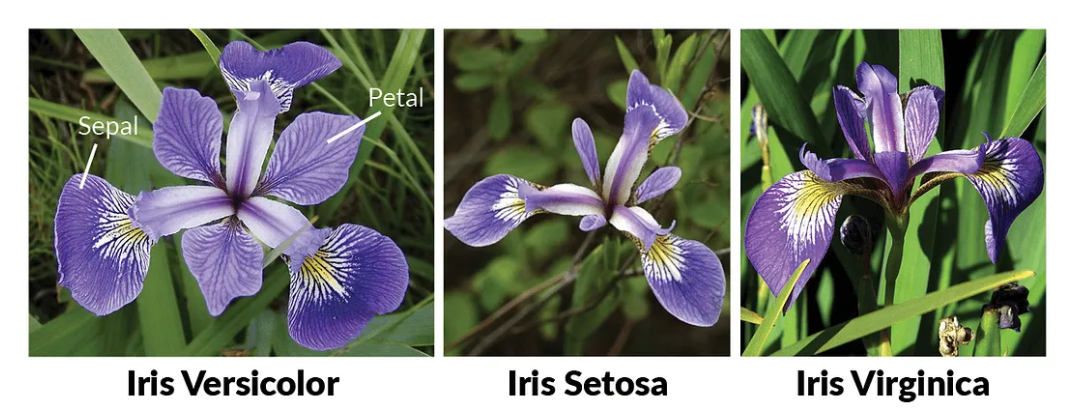

**Problem Statement:**
To build a ML model that can learn from the measurements of the Iris flower, whose species it belongs to, so that we can predict for a new Iris flower.


**What is given:**
1. Input 1: Petal: Length and width (in cm)
2. Input 2: Sepal: Length and width (in cm)
3. Output: Species

Since, input and output is given: **Supervised Learning**

# Load the dataset:



In [7]:
#load the iris dataset
iris_df=pd.read_csv('/content/Iris.csv')
iris_df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In our Dataset: we have 150 entries.

ML model is in 2 phases:
1. Training the model(75-80%) : we need training data
2. Testing the model(20-25%) : we need test data

Split our data into : Training data and Testing data

In [12]:
from sklearn.model_selection import train_test_split

We know our data has both input and output.

Input Columns (X): Features

Output Column (Y): Target

In [9]:
#identify the input columns as features  from the dataset
# Features: [SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm]
# Option 1:::  X=iris_df.iloc[:,1:5]  # Col1 to col4
# Option 2:
X=iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [10]:
# identify the output column or target column from the dataset
# Target: [species]
## Option 1:
Y=iris_df['Species']

## Option 2: Y = iris_df.iloc[:,-1]    # (all rows, last col)

In [13]:
from sklearn.model_selection import train_test_split

# X: Feature set
# Y : Target column
# X_train: features for training
# Y_train: target for the training features
# X_test: features for testing
# Y_test: target for the testing features

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:

# standardization for features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Apply ML algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
## After learning, apply it on the testing data
y_pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [19]:
# Provide samlpe test values:
test_values= [5.9,3.0,1.6,0.2]
predictied_species=knn.predict([test_values])
print(predictied_species)

['Iris-virginica']
